In [10]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df=pd.read_csv("/content/final_clean_data.csv")
df.head()

,Unnamed: 0,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month
0,1,2019-12-29 13:54:00,[],JesusDailyTwits,1,0,0,depression,best depression killer worshipping jesus try v...,2019,12
1,2,2019-12-29 12:47:00,[],Aluvrendar,67,3,6,depression,hope blessings majlis depression never return ...,2019,12
2,3,2019-12-29 12:33:00,[],mengwong,0,2,0,depression,feels like theory psychohistory ing together h...,2019,12
3,4,2019-12-28 18:33:00,[],haziqqqaaahzik,10,1,8,depression,post project depression cant believe days ende...,2019,12
4,8,2019-12-26 02:16:00,[],NASYRANN_,0,1,3,depression,depression thought,2019,12


#EDA

In [ ]:
word_counts_by_search=df["search"].value_counts()
word_counts_by_search=pd.DataFrame(word_counts_by_search)
word_counts_by_search.columns=["frequency"]
word_counts_by_search["search"]=word_counts_by_search.index
word_counts_by_search.head()
fig= px.bar(word_counts_by_search, x="frequency", y="search", color="frequency", orientation='h', height=1500,
            title='Frequency of terms used in search',
            labels={
                'search': 'Term',
                'frequency': 'Frequency of each term'
            })
fig.show()

In [ ]:
years=df["year"].value_counts()
years=pd.DataFrame(years)
years.columns=["frequency"]
years["year"]=years.index
years.head()
fig= px.bar(years, x="year", y="frequency", color="year",
            title='Number Of tweets every year from 2019 to 2021',
            labels={
                'year': 'Year from 2019 to 2021',
                'Frequency of each term': 'Number of tweets'
            })
fig.show()

In [ ]:
month=df["month"].value_counts()
month=pd.DataFrame(month)
month.columns=["frequency"]
month["month"]=month.index
month.head()
fig= px.bar(month, x="month", y="frequency", color="month",
            title='Number Of tweets every month from 2019 to 2021',
            labels={
                'year': 'Year from 2019 to 2021',
                'frequency': 'Number of tweets'
            })
fig.show()

In [ ]:
month_2019=df[df["year"]==2019]
month_2019=month_2019["month"].value_counts()
month_2019=pd.DataFrame(month_2019)
month_2019.head()
month_2019.columns=["frequency"]
month_2019["month"]=month_2019.index
month.head()
fig= px.bar(month_2019, y="month", x="frequency", color="month", orientation='h', height=700,
            title='Number Of tweets every month for the year 2019 ',
)
fig.show()

In [ ]:
month_2020=df[df["year"]==2020]
month_2020=month_2020["month"].value_counts()
month_2020=pd.DataFrame(month_2020)
month_2020.head()
month_2020.columns=["frequency"]
month_2020["month"]=month_2020.index
month.head()
fig= px.bar(month_2020, y="month", x="frequency", color="month", orientation='h', height=700,
            title='Number Of tweets every month for the year 2020 ',
)
fig.show()

In [ ]:
month_2021=df[df["year"]==2021]
month_2021=month_2021["month"].value_counts()
month_2021=pd.DataFrame(month_2021)
month_2021.head()
month_2021.columns=["frequency"]
month_2021["month"]=month_2021.index
month.head()
fig= px.bar(month_2021, y="month", x="frequency", color="month", orientation='h', height=700,
            title='Number Of tweets every month for the year 2021 ',
)
fig.show()

#**Sentiment Analysis**

In [4]:
df[['polarity', 'subjectivity']] = df['clean_tweet4'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

In [ ]:
df.head()

,Unnamed: 0,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,polarity,subjectivity
0,1,2019-12-29 13:54:00,[],JesusDailyTwits,1,0,0,depression,best depression killer worshipping jesus try v...,2019.0,12.0,1.0000,0.30
1,2,2019-12-29 12:47:00,[],Aluvrendar,67,3,6,depression,hope blessings majlis depression never return ...,2019.0,12.0,0.0000,0.00
2,3,2019-12-29 12:33:00,[],mengwong,0,2,0,depression,feels like theory psychohistory ing together h...,2019.0,12.0,0.0000,0.00
3,4,2019-12-28 18:33:00,[],haziqqqaaahzik,10,1,8,depression,post project depression cant believe days ende...,2019.0,12.0,0.3625,0.65
4,8,2019-12-26 02:16:00,[],NASYRANN_,0,1,3,depression,depression thought,2019.0,12.0,0.0000,0.00


In [34]:
sentiment_df = pd.DataFrame(df, columns=["polarity", "clean_tweet4"])
sentiment_df.head()

,polarity,clean_tweet4
0,1.0000,best depression killer worshipping jesus try v...
1,0.0000,hope blessings majlis depression never return ...
2,0.0000,feels like theory psychohistory ing together h...
3,0.3625,post project depression cant believe days ende...
4,0.0000,depression thought


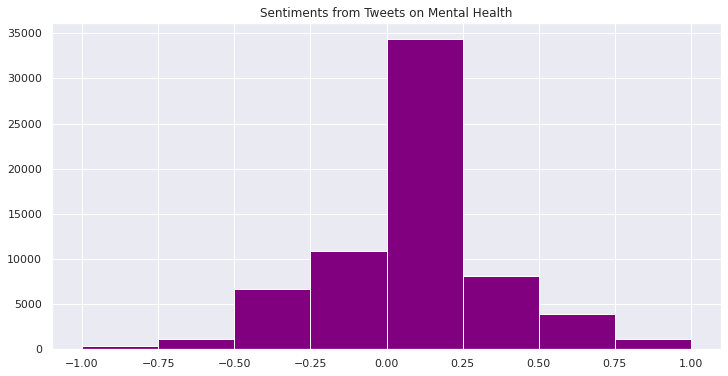

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Mental Health")
plt.show()


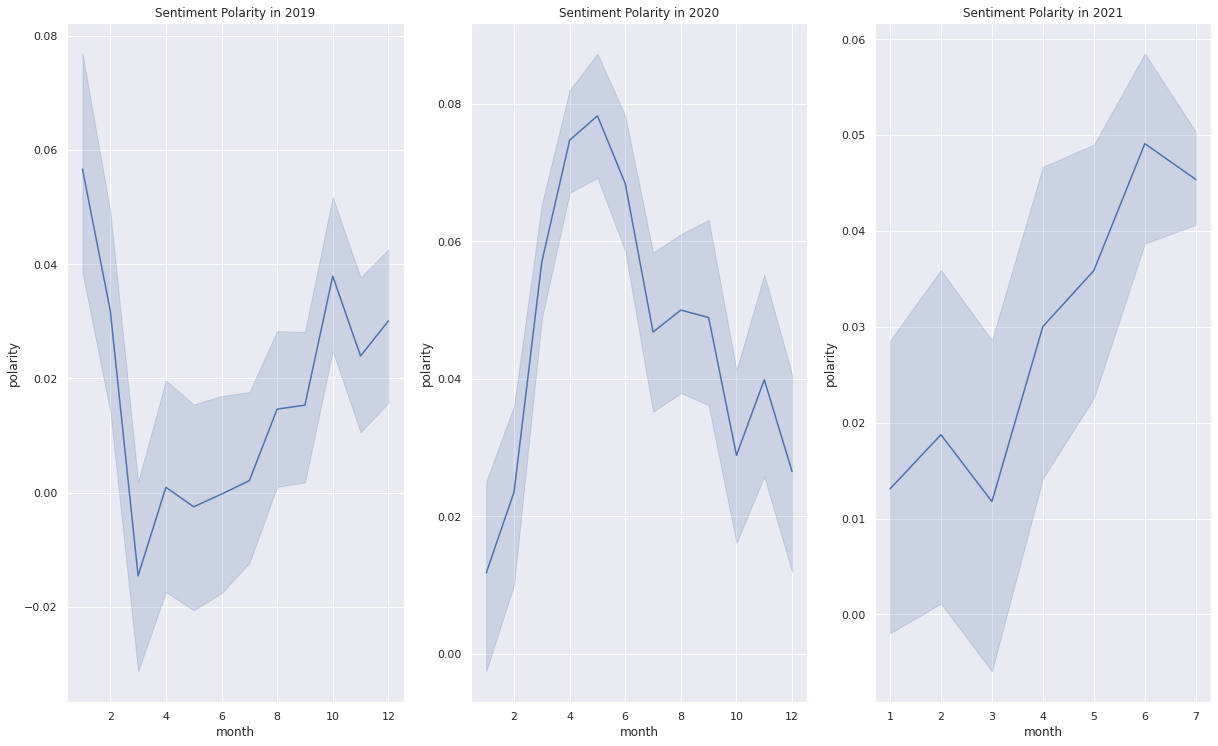

In [5]:
sentiment_2019= df.query("year==2019")
sentiment_2020= df.query("year==2020")
sentiment_2021= df.query("year==2021")

fig, axs =plt.subplots(ncols=3)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_size_inches(20.5, 12.5, forward=True)
sns.lineplot(data=sentiment_2019, x="month", y="polarity" ,ax= axs[0]).set_title("Sentiment Polarity in 2019");
sns.lineplot(data=sentiment_2020, x="month", y="polarity", ax= axs[1]).set_title("Sentiment Polarity in 2020");
sns.lineplot(data=sentiment_2021, x="month", y="polarity" ,ax= axs[2]).set_title("Sentiment Polarity in 2021");


##**Visualizing the unigram, bigram, and trigram on the text data**

help 8678
singapore 6928
tired 6706
covid 5563
like 4658
fight 4484
people 4101
amp 3914
day 3420
time 3380
dead 3270
mask 2933
need 2916
good 2336
death 2336
new 2304
know 2294
really 2190
im 2151
pandemic 2139
work 2053
hospital 1982
today 1979
love 1970
home 1921
stress 1892
life 1891
think 1843
want 1843
lockdown 1717


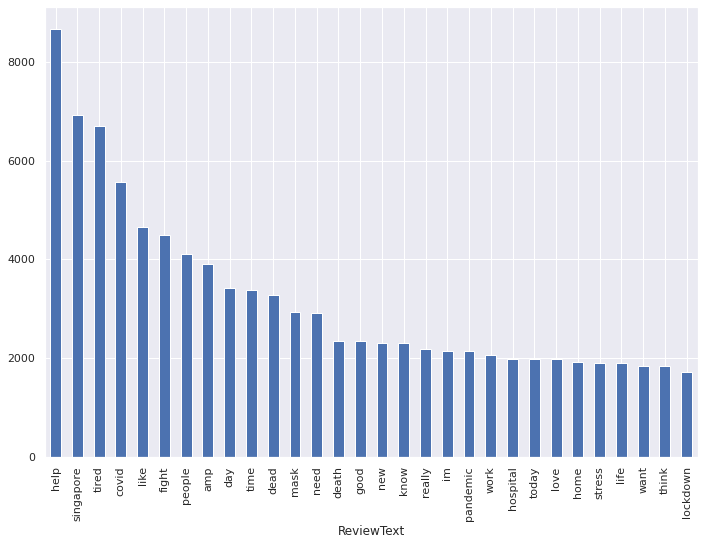

In [78]:
# Visualizing unigrams
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot
lissst=' '.join([str(i) for i in df['clean_tweet4']]).split()
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(lissst, 30)
for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar')


circuit breaker 1477
mental health 661
social distancing 628
im tired 601
please help 439
need help 433
wear mask 371
feel like 333
stay home 310
stay safe 274
wearing mask 266
get tired 255
help us 253
face mask 249
general hospital 224
singapore singapore 220
sick tired 213
covid vaccine 212
new normal 209
breaker day 202
take care 197
first time 195
social media 194
covid cases 194
last night 181
fucking tired 178
looks like 177
short term 177
singapore circuit 170
singapore zerowaste 159
zerowaste free 159
beta testing 159
pinned tweet 156
spread love 154
free trading 153
trading signals 153
signals beta 153
beta symbol 153
timeframe min 153
min platform 153


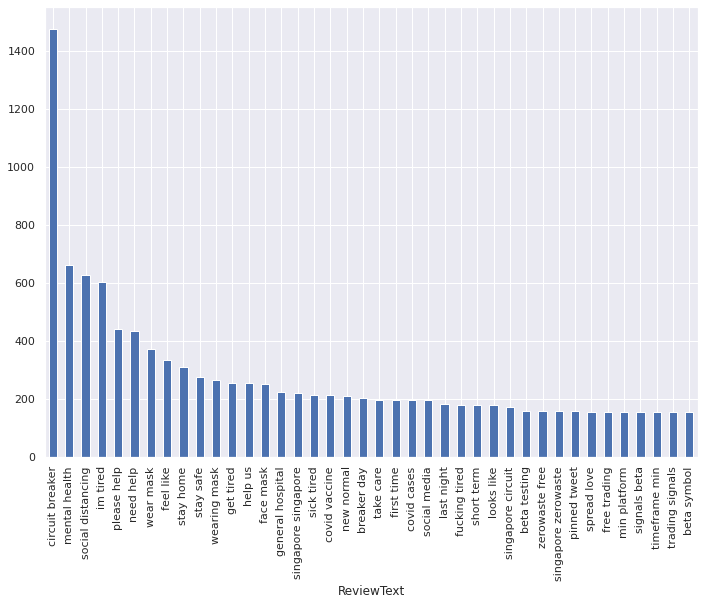

In [77]:
# # Visualizing bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

x = df['clean_tweet4'].values.astype('U')
descriptions=x.tolist() 
#descriptions
common_words = get_top_n_bigram(descriptions, 40)
for word, freq in common_words:
    print(word, freq)

df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar')

circuit breaker day 202
singapore circuit breaker 170
singapore zerowaste free 159
singapore singapore zerowaste 155
free trading signals 153
trading signals beta 153
signals beta symbol 153
timeframe min platform 153
min platform zentrader 153
platform zentrader strategy 153
zentrader strategy short 153
strategy short term 153
short term trend 153
term trend reversal 153
trend reversal beta 153
reversal beta testing 153
beta testing read 153
testing read pinned 153
read pinned tweet 153
pinned tweet full 153
tweet full info 153
full info forexsignals 153
info forexsignals zentrader 153
day circuit breaker 115
never get tired 106
circuit breaker period 98
singapore general hospital 97
beta symbol btcusd 95
symbol btcusd btcjpy 95
btcusd btcjpy bitcoin 95
btcjpy bitcoin direction 95
changi general hospital 92
direction sell timeframe 92
sell timeframe min 92
mask singapore singapore 83
post circuit breaker 83
circuit breaker measures 80
day singapore circuit 80
dont fight feeling 75
buk

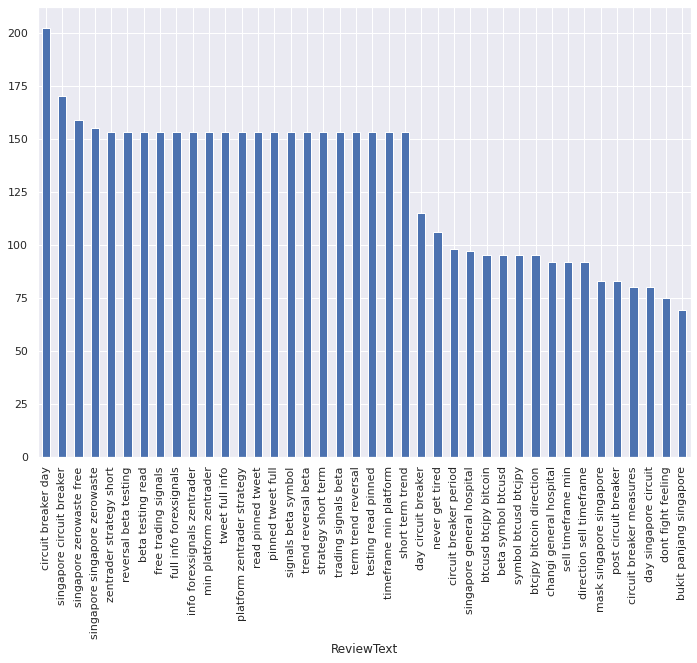

In [76]:
# # Visualizing trigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

x = df['clean_tweet4'].values.astype('U')
descriptions=x.tolist() 
#descriptions
common_words = get_top_n_bigram(descriptions, 40)
for word, freq in common_words:
    print(word, freq)

df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar')

#**WorldClouds Before and during Covid**

**Before Covid**

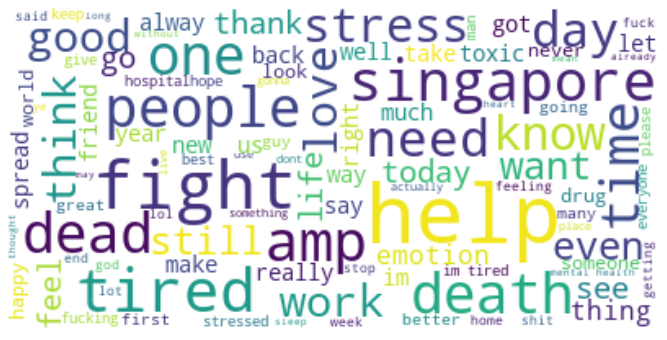

In [23]:
text= " ".join(review for review in sentiment_2019.clean_tweet4)

#Generate a wordcloud image
worldcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

#display image
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Durnig Covid**

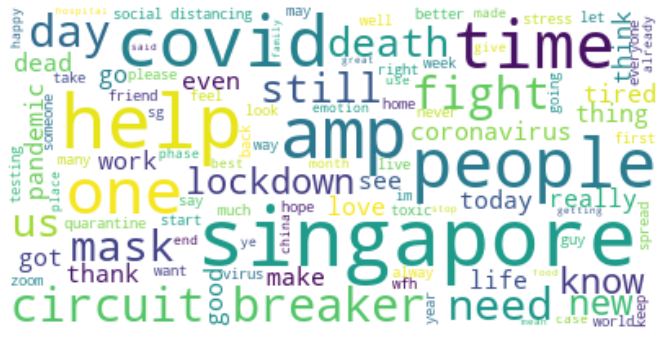

In [24]:
text= " ".join(review for review in sentiment_2020.clean_tweet4)

#Generate a wordcloud image
worldcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

#display image
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

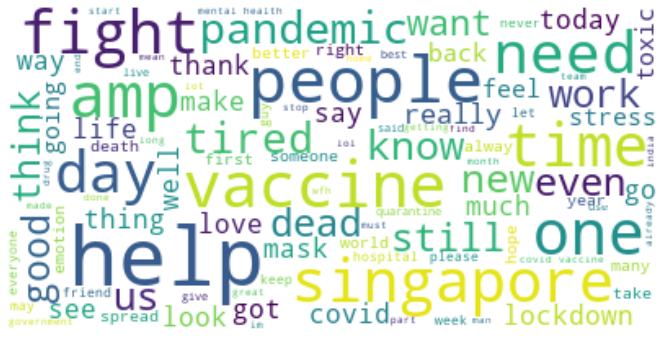

In [26]:
text= " ".join(str(review) for review in sentiment_2021.clean_tweet4)

#Generate a wordcloud image
worldcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

#display image
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.show()